In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
def detect_anomaly(l):
    l_diff = [l[i]-l[i-1] for i in range(1, len(l))]
    for i in range(1, len(l_diff)):
        if l_diff[i] > 10 * l_diff[i-1]:
            return False
    return True

In [57]:
def adjust(l):
    l_diff = [l[i]-l[i-1] for i in range(1, len(l))]
    for i in range(1, len(l_diff)):
        if l_diff[i] > 10 * l_diff[i-1]:
            l_diff[i] = (sum(l_diff[i-2:i]) + sum(l_diff[i+1:i+3])) / 4
    l_new = [l[0] for _ in l]
    for i in range(1, len(l)):
        l_new[i] = l_new[i-1] + l_diff[i-1]
    return l_new

In [67]:
anomalies = []
for history_file in os.listdir('./results'):
    if not history_file.endswith('.npz'):
        continue
    history = np.load('./results/{}'.format(history_file))
    if 'time' in history:
        time_history = history['time']
        if not detect_anomaly(time_history):
            anomalies.append(history_file)

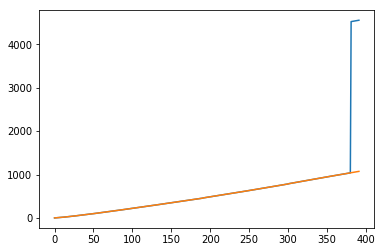

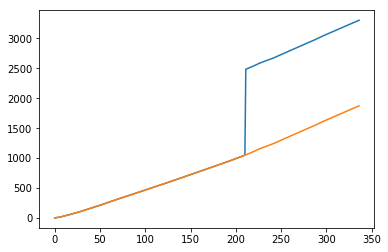

In [63]:
for history_file in anomalies:
    history = np.load('./results/{}'.format(history_file))
    plt.plot(history['time'])
#     plt.show()
    plt.plot(adjust(history['time']))
    plt.show()

In [68]:
anomalies

[]

In [66]:
anomalies

['scale_free_64_1_WassR2_5_old.npz', 'scale_free_64_3_WassR2_40_old.npz']

In [65]:
for history_file in ['scale_free_64_1_WassR2_5.npz', 'scale_free_64_3_WassR2_40.npz']:
    history = np.load('./results/{}'.format(history_file)

In [69]:
history_file = 'scale_free_64_1_WassR2_5.npz'
history = np.load('./results/{}'.format(history_file))

In [73]:
history['embed_distances']

array([1.3752405 , 1.40852536, 1.64322992, ..., 3.58778882, 3.02345482,
       4.05996455])